<a href="https://colab.research.google.com/github/Marvel280904/W3-DataMining-Marvel/blob/main/Exercise_Week_3_Pandas_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [34]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

1. display 5 columns from dataset

In [35]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/Marvel280904/W3-DataMining-Marvel/refs/heads/main/MBA.csv")
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [6]:
#2
df.info()
#conclusion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [9]:
#3a
print(df['admission'].value_counts(dropna=False))

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [10]:
#3b
print(df['race'].value_counts(dropna=False))

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [11]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)

<ipython-input-11-12caece74d44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('other', inplace=True)


5. recheck missing value

In [16]:
#5
missing_value = df.isnull()
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [36]:
# 6
df.drop('application_id', axis=1, inplace=True)

7. show describe column and conclude what the insight is from that column

In [18]:
#7
df.describe()
#conclusion


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

<function matplotlib.pyplot.show(close=None, block=None)>

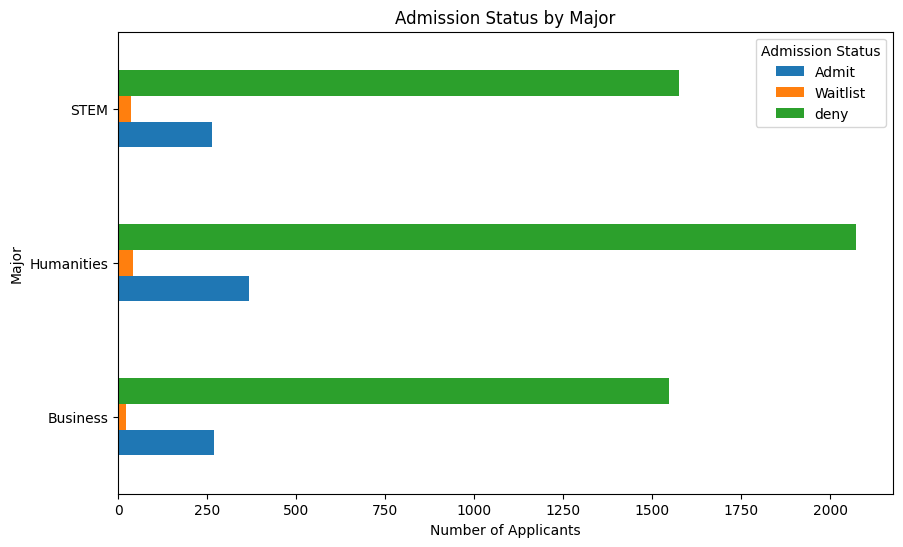

In [21]:
#8

# Group data by major and admission status, then count the occurrences
data = df.groupby(['major','admission'])['major'].count().unstack()
# Create a horizontal bar chart
data.plot (kind='barh',figsize=(10,6))
# Customize the chart
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
# Show the chart
plt.show

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

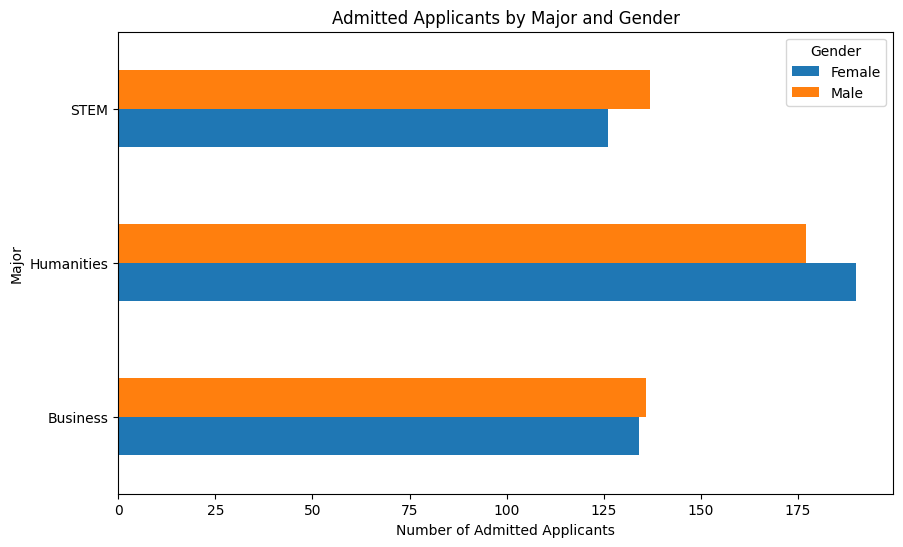

In [27]:
#9

# Filter the DataFrame to include only admitted applicants
dataframe_filter = df[df['admission'] == 'Admit']

# Group data by major and gender, then count the occurrences
data_frame = dataframe_filter.groupby(['major', 'gender']).size().unstack()

# Create a horizontal bar chart
data_frame.plot (kind='barh',figsize=(10,6))

# Customize the chart
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')

# Show the chart
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

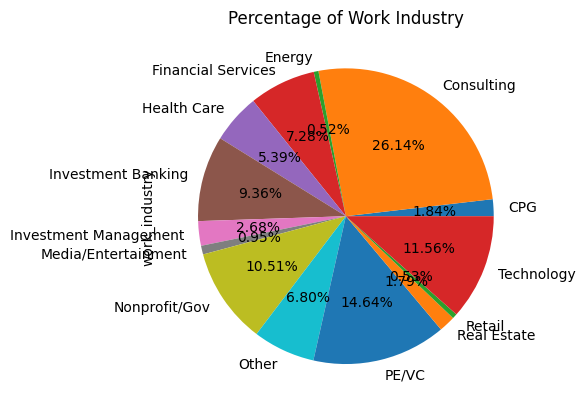

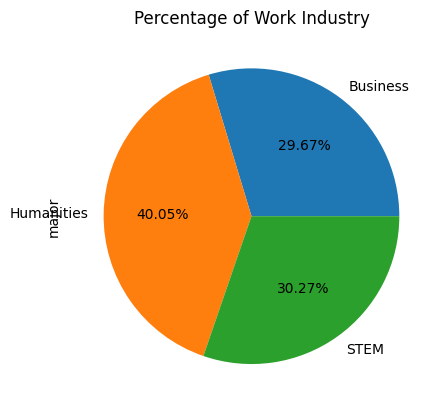

In [8]:
#10
# cek persentase gender, agar kita dapat mengetahui industri pekerjaan yang mana yang paling diminati.
# Dari hasil visualisasi dapat terlihat bahwa consulting memiliki persentase terbanyak sebesar 26.14%
data = df.groupby('work_industry')['work_industry'].count()
data.plot(kind='pie', autopct='%1.2f%%',
title='Percentage of Work Industry')
plt.show()

11. create your own insightful visualization and explain it in at least 2 sentences

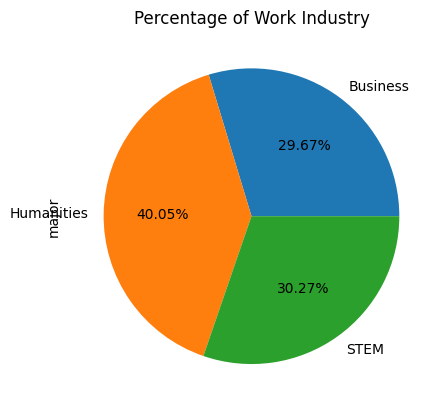

In [9]:
#11
# cek persentase major, agar kita dapat mengetahui major apa yang paling banyak
# dari hasil visualisasi dapat terlihat bahwa humanities memiliki persentase terbanyak sebesar 40.05%
data = df.groupby('major')['major'].count()
data.plot(kind='pie', autopct='%1.2f%%',
title='Percentage of Work Industry')
plt.show()

In [29]:
#12
# Encode categorical columns (except the admission column)
df['admission'].fillna('Deny', inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()

# Columns to be encoded
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']

# Apply LabelEncoder to each column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the resulting dataframe with encoded columns
df_encoded = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']]
df_encoded.head()

<ipython-input-29-8fcebaf1afd7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


12. encode categorical columns and display the results

In [37]:
# Encode the admission column
le = LabelEncoder()

# Encode the categorical columns
df['gender'] = le.fit_transform(df['gender'])
df['international'] = le.fit_transform(df['international'])
df['major'] = le.fit_transform(df['major'])
df['race'] = le.fit_transform(df['race'].fillna('Unknown'))  # Handling NaN by filling with 'Unknown'
df['work_industry'] = le.fit_transform(df['work_industry'].fillna('Unknown'))  # Handling NaN similarly
df['admission'] = df['admission'].map({'Admit': 1, 'NaN': 0, 'Deny': 0}).fillna(0)  # Binary encoding for admission

# Display the encoded dataset
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,1.0
1,1,0,3.28,1,1,680.0,5.0,6,0.0
2,0,1,3.30,0,4,710.0,5.0,13,1.0
3,1,0,3.47,2,1,690.0,6.0,13,0.0
4,1,0,3.35,2,2,590.0,5.0,1,0.0


13. create a heatmap to see the correlation and explain the conclusion

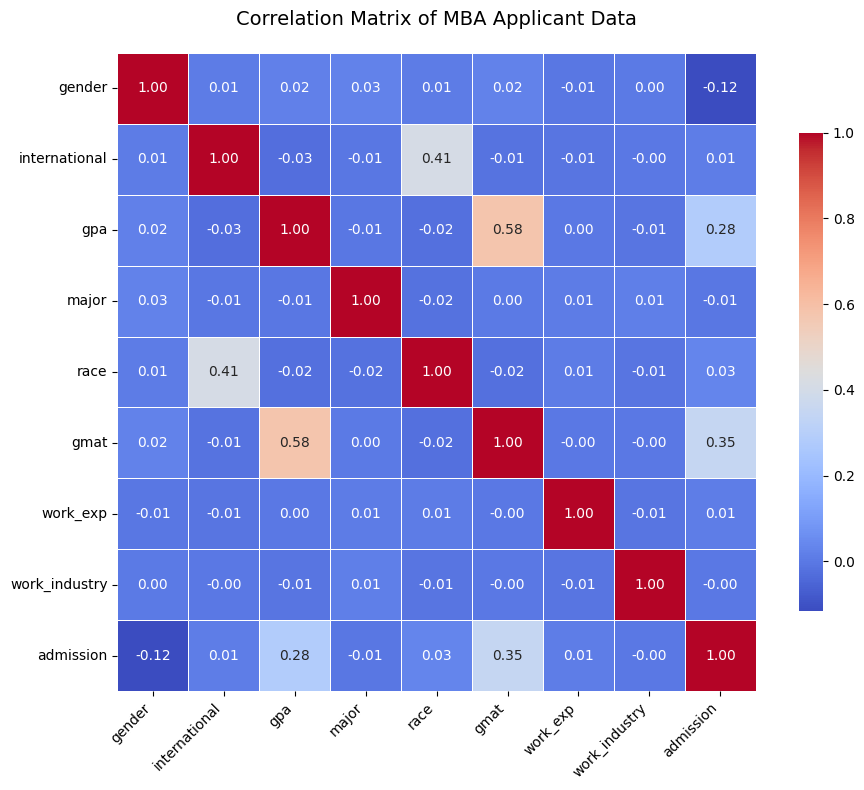

In [39]:
#13

correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure with a corrected size
plt.figure(figsize=(10, 8))  # Adjust the size for a better fit

# Creating the heatmap with annotations
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": .75},  # Adjust the color bar size
            linewidths=0.5,           # Add lines between the squares
            annot_kws={"size": 10})   # Control annotation size

# Adjust the label rotations
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0, fontsize=10)               # Keep y-axis labels straight

# Add the title
plt.title('Correlation Matrix of MBA Applicant Data', fontsize=14, pad=20)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [ ]:
# prompt: make a model classification

# Separate features and target variable

# Split the data into training and testing sets

# Create a Decision Tree Classifier

# Train the model

# Make predictions on the test set

# Evaluate the model


Accuracy: 0.7828894269572235


In [ ]:
# Get the average GPA

# Create Lisa's data as a dictionary

# Create a DataFrame with Lisa's data

# Encode categorical features for Lisa's data

# Make a prediction using the trained model

# Decode the prediction back to the original label


Prediction for Lisa's admission: Finance
